<a href="https://colab.research.google.com/github/azruddin0406/DEEP-LEARNING/blob/main/Image_classification_using_CNN_(CIFAR10_dataset)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
 X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# Lets convert the above into one dimention array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

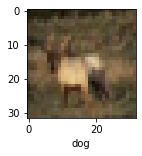

In [8]:
plot_sample(X_train, y_train, 3)

In [9]:
 X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
# Normalize the value
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# Lets first the accuracy with ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 92s 58ms/step - loss: 1.8202 - accuracy: 0.3493
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6259 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5437 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4832 - accuracy: 0.4759
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4346 - accuracy: 0.4934


In [12]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.5656 - accuracy: 0.4464


[1.565597414970398, 0.446399986743927]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.44      0.50      1000
           1       0.33      0.87      0.48      1000
           2       0.42      0.28      0.34      1000
           3       0.36      0.36      0.36      1000
           4       0.60      0.23      0.33      1000
           5       0.46      0.26      0.33      1000
           6       0.47      0.60      0.53      1000
           7       0.62      0.45      0.52      1000
           8       0.51      0.64      0.57      1000
           9       0.46      0.33      0.39      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.43     10000
weighted avg       0.48      0.45      0.43     10000



In [14]:
# Lets use CNN model for predicton
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPool2D((2, 2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5047 - accuracy: 0.4592
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1379 - accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0206 - accuracy: 0.6442
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9460 - accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8847 - accuracy: 0.6929
Epoch 6/10
1563/1563 [==============================] - 55s 36ms/step - loss: 0.8253 - accuracy: 0.7126
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7833 - accuracy: 0.7279
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7422 - accuracy: 0.7419
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7029 - accuracy: 0.7554
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9253 - accuracy: 0.6977


[0.9253484606742859, 0.697700023651123]

In [18]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

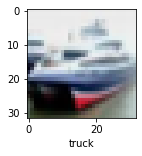

In [19]:
plot_sample(X_test, y_test, 1)

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[7.85463769e-03, 1.53604511e-03, 1.24286069e-02, 7.70149648e-01,
        1.23109465e-04, 1.98889017e-01, 2.76965532e-03, 6.05374225e-05,
        5.76051837e-03, 4.28247673e-04],
       [1.09522464e-02, 1.57831423e-02, 3.01116393e-06, 1.42803483e-05,
        3.74383194e-06, 2.53355958e-09, 5.92218186e-08, 1.94130780e-06,
        9.72848058e-01, 3.93521652e-04],
       [3.16464007e-02, 4.16370295e-02, 9.93559603e-04, 1.03421835e-02,
        3.92336026e-03, 2.40353605e-04, 7.08527456e-04, 3.59827839e-03,
        8.67259085e-01, 3.96512002e-02],
       [9.82772410e-01, 5.28673921e-03, 4.86348697e-04, 2.68888148e-03,
        1.97544717e-03, 3.14400449e-06, 8.20823770e-05, 3.68783622e-05,
        4.82534012e-03, 1.84269820e-03],
       [1.71442366e-06, 6.36902769e-05, 1.15397181e-02, 3.23517062e-02,
        2.83521652e-01, 3.08259064e-03, 6.69093609e-01, 1.11755453e-05,
        3.31779680e-04, 2.33049559e-06]], dtype=float32)

In [21]:
np.argmax([5,12,1,2])

1

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

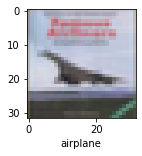

In [26]:
plot_sample(X_test, y_test, 3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.79      0.82      0.80      1000
           2       0.61      0.56      0.58      1000
           3       0.52      0.51      0.51      1000
           4       0.72      0.53      0.61      1000
           5       0.64      0.55      0.59      1000
           6       0.74      0.80      0.77      1000
           7       0.69      0.80      0.74      1000
           8       0.81      0.81      0.81      1000
           9       0.73      0.84      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

